In [1]:
import dask
#import dask.dataframe as dd
import warnings
import numpy as np
import pandas as pd
import gc
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report

from sklearn import svm
from sklearn.metrics import classification_report, make_scorer, accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import lightgbm as lgb
from matplotlib import pyplot

from sklearn.metrics import roc_curve 
from scipy import stats
from sklearn.metrics import confusion_matrix
import itertools


from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils import resample
from sklearn.linear_model import RidgeClassifier

!pip install catboost

Mounted at /content/drive
     |████████████████████████████████| 67.3MB 78kB/s 


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [4]:
gc.collect()

170

In [5]:
### Reading Dataset
trainn_data = pd.read_csv("/content/drive/My Drive/CAP 5610 Project data/train.csv", dtype=dtypes) 

In [64]:
gc.collect()

6429

In [65]:
### Sampling Dataset
train_data = trainn_data.sample(frac=0.05)
train_data.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
397408,0b6e2ce17b07f4bbc60c92ed6ab14b3a,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1209.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,51,80810.0,27.0,98.0,103,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2252.0,253668.0,8.0,5.0,...,SSD,228364.0,1,16384.0,Desktop,32.000000,2560.0,1440.0,Desktop,NaN,4.294967e+09,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,IBSClean,5.0,26,FullAuto,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,142.0,9438.0,1,NaN,0.0,0,0,0.0,1.0,6.0,1
5447110,9c5a1a0e353b996f0c37a6c2845b0c33,win8defender,1.1.15200.1,4.18.1807.18075,1.275.400.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,44,90994.0,18.0,57.0,-38,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,4588.0,313586.0,2.0,5.0,...,HDD,103232.0,0,4096.0,Desktop,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,IBSClean,9.0,34,FullAuto,0,INVALID_LICENSE,Retail,NaN,0.0,Retail,NaN,142.0,2847.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
6541606,bbbe9fb1fae51798d5b871f11da4f521,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,124,29356.0,27.0,276.0,74,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,3132.0,226753.0,8.0,5.0,...,SSD,242874.0,0,16384.0,Notebook,17.296875,1920.0,1080.0,Mobile,NaN,0.000000e+00,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,Reset,8.0,31,FullAuto,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,142.0,31026.0,1,NaN,0.0,0,0,0.0,1.0,3.0,1
6053170,adbe4e06a33057f4b82777bb28470c7b,win8defender,1.1.15200.1,4.18.1807.18075,1.275.938.0,0,0.0,1,NaN,11280.0,2.0,1.0,1,68,61378.0,27.0,276.0,74,windows10,x64,10.0.0.0,16299,256,rs3,16299.15.amd64fre.rs3_release.170928-1534,Pro,1.0,0,NaN,0.0,117.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,2206.0,247520.0,8.0,5.0,...,SSD,227579.0,0,16384.0,Notebook,17.296875,1600.0,900.0,Mobile,NaN,0.000000e+00,10.0.16299.371,amd64,rs3_release,16299,371,Professional,PROFESSIONAL,Upgrade,7.0,30,UNKNOWN,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,500.0,33097.0,0,NaN,0.0,0,0,0.0,1.0,12.0,1
1321127,25ef

#**Data Description:**

In [66]:
### Data Description
def data_details():
#Number of Rows and Columns
    print('------------- Description of the Dataset -------------')
    print('The dataset has ', train_data.shape[1], ' features')
    print('----------------------------')
    print('The dataset has ', train_data.shape[0], ' rows')    
    print('----------------------------')
    
    #Number of Numeric and Categorical Columns
    print ("There are {} numeric and {} categorical columns in dataset".format(train_data.select_dtypes(include=[np.number]).shape[1],train_data.select_dtypes(exclude=[np.number]).shape[1]))
    print ('----------------------------')

    display(train_data.describe().transpose())

data_details()  

------------- Description of the Dataset -------------
The dataset has  83  features
----------------------------
The dataset has  446074  rows
----------------------------
There are 53 numeric and 30 categorical columns in dataset
----------------------------


,count,mean,std,min,25%,50%,75%,max
IsBeta,446074.0,2.241781e-06,1.497258e-03,0.000000,0.000000,0.0,0.000000e+00,1.000000e+00
RtpStateBitfield,444411.0,NaN,0.000000e+00,0.000000,7.000000,7.0,7.000000e+00,3.500000e+01
IsSxsPassiveMode,446074.0,1.708685e-02,1.295952e-01,0.000000,0.000000,0.0,0.000000e+00,1.000000e+00
DefaultBrowsersIdentifier,21551.0,inf,inf,1.000000,788.000000,1632.0,2.290000e+03,3.208000e+03
AVProductStatesIdentifier,444221.0,4.778441e+04,1.399914e+04,16.000000,49480.000000,53447.0,5.344700e+04,7.048600e+04
AVProductsInstalled,444221.0,NaN,0.000000e+00,1.000000,1.000000,1.0,2.000000e+00,6.000000e+00
AVProductsEnabled,444221.0,NaN,0.000000e+00,0.000000,1.000000,1.0,1.000000e+00,4.000000e+00
HasTpm,446074.0,9.880737e-01,1.085544e-01,0.000000,1.000000,1.0,1.000000e+00,1.000000e+00
CountryIdentifier,446074.0,1.080182e+02,6.305585e+01,1.000000,51.000000,97.0,1.620000e+02,2.220000e+02
CityIdentifier,429623.0,8.138632e+04,4.890122e+04,8.000000,36929.000000,82373.0,1.239840e+05,1.679590e+05


In [67]:
gc.collect()

62

# **Exploratory Data Analysis (EDA) and Feature Engineering**

###**Analyzing Missing Values:**

In [68]:
def display_missing_values(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        print('------------------------------------------------------------------------------------------')
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

print(display_missing_values(train_data))
print('------------------------------------------------------------------------------------------')

Your selected dataframe has 83 columns.
There are 43 columns that have missing values.
------------------------------------------------------------------------------------------
                                                   Missing Values  % of Total Values
PuaMode                                                    445956              100.0
Census_ProcessorClass                                      444247               99.6
DefaultBrowsersIdentifier                                  424523               95.2
Census_IsFlightingInternal                                 370478               83.1
Census_InternalBatteryType                                 317140               71.1
Census_ThresholdOptIn                                      283787               63.6
Census_IsWIMBootEnabled                                    283404               63.5
SmartScreen                                                159067               35.7
OrganizationIdentifier                                   

In [69]:
gc.collect()

115

### **Separating Features into Binary, Numerical and Categorical:**

In [70]:
def segregate_features():
    binary = [col for col in train_data.columns if train_data[col].nunique() == 2]
    numerical_floats = ['Census_ProcessorCoreCount',
                        'Census_PrimaryDiskTotalCapacity',
                        'Census_SystemVolumeTotalCapacity',
                        'Census_TotalPhysicalRAM',
                        'Census_InternalPrimaryDiagonalDisplaySizeInInches',
                        'Census_InternalPrimaryDisplayResolutionHorizontal',
                        'Census_InternalPrimaryDisplayResolutionVertical',
                        'Census_InternalBatteryNumberOfCharges']
    categorical = [col for col in train_data.columns if (col not in numerical_floats) & (col not in binary)]
    return binary, numerical_floats, categorical
  
binary_columns, numerical_float_columns, categorical_columns = segregate_features()

### **Statistics of Column Category After Segregating:**

------------------------------------------------------------------------------------------
                  Type  Column Count
1    Numerical columns             8
0       Binary columns            19
2  Categorical columns            56
------------------------------------------------------------------------------------------


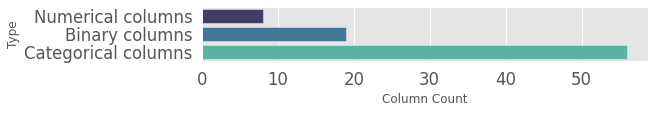

In [71]:
type_df = [['Binary columns', len(binary_columns)], ['Numerical columns', len(numerical_float_columns)], ['Categorical columns', len(categorical_columns)]]
type_df = pd.DataFrame(type_df, columns=['Type', 'Column Count']).sort_values('Column Count', ascending=True)
print('------------------------------------------------------------------------------------------')
print(type_df)
print('------------------------------------------------------------------------------------------')


plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(8, 1))
sns.barplot(x="Column Count", y="Type", data=type_df, label="Feature Type Distribution", palette='mako')
plt.show()

### **Analyzing Cardinality of Features:**

In [72]:
total = train_data.shape[0]
missing_df = []
cardinality_df = []
for col in train_data.columns:
    missing_df.append([col, train_data[col].count(), total])
    cardinality = train_data[col].nunique()
    if cardinality > 2 and col != 'MachineIdentifier':
        cardinality_df.append([col, cardinality])

missing_df = pd.DataFrame(missing_df, columns=['Column', 'Number of records', 'Total']).sort_values("Number of records", ascending=False)
cardinality_df = pd.DataFrame(cardinality_df, columns=['Column', 'Cardinality']).sort_values("Cardinality", ascending=False)
# print('------------------------------------------------------------------------------------------')
# print(missing_df)
pd.set_option('display.max_rows', 500)
print('------------------------------------------------------------------------------------------')
print(cardinality_df)
print('------------------------------------------------------------------------------------------')

------------------------------------------------------------------------------------------
                                               Column  Cardinality
35                   Census_SystemVolumeTotalCapacity       131901
28                          Census_OEMModelIdentifier        38139
10                                     CityIdentifier        35011
59                   Census_FirmwareVersionIdentifier        22522
3                                        AvSigVersion         6303
6                           AVProductStatesIdentifier         5117
43              Census_InternalBatteryNumberOfCharges         4817
31                    Census_ProcessorModelIdentifier         1750
27                           Census_OEMNameIdentifier         1236
33                    Census_PrimaryDiskTotalCapacity         1025
38  Census_InternalPrimaryDiagonalDisplaySizeInInches          526
36                            Census_TotalPhysicalRAM          524
5                           DefaultBro

###**Missing Value Distribution Against Each Feature:**

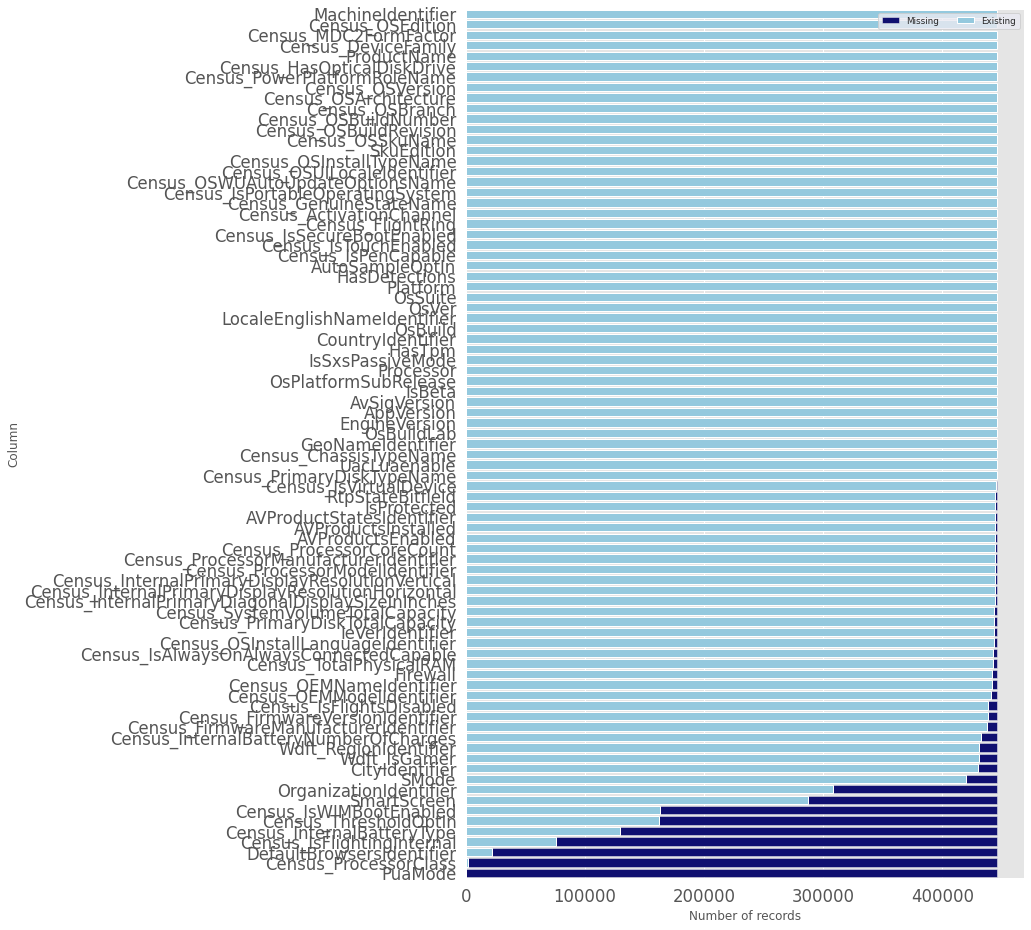

In [73]:
f, ax = plt.subplots(figsize=(10, 16))
sns.set_color_codes("muted")
sns.barplot(x="Total", y="Column", data=missing_df, label="Missing", color="navy")
sns.set(font_scale=0.8)
sns.barplot(x="Number of records", y="Column", data=missing_df, label="Existing", color="skyblue")
ax.legend(ncol=2, loc="upper right", frameon=True)
plt.show()

### **Distribution of Cardinality Against each Categorical Feature:**

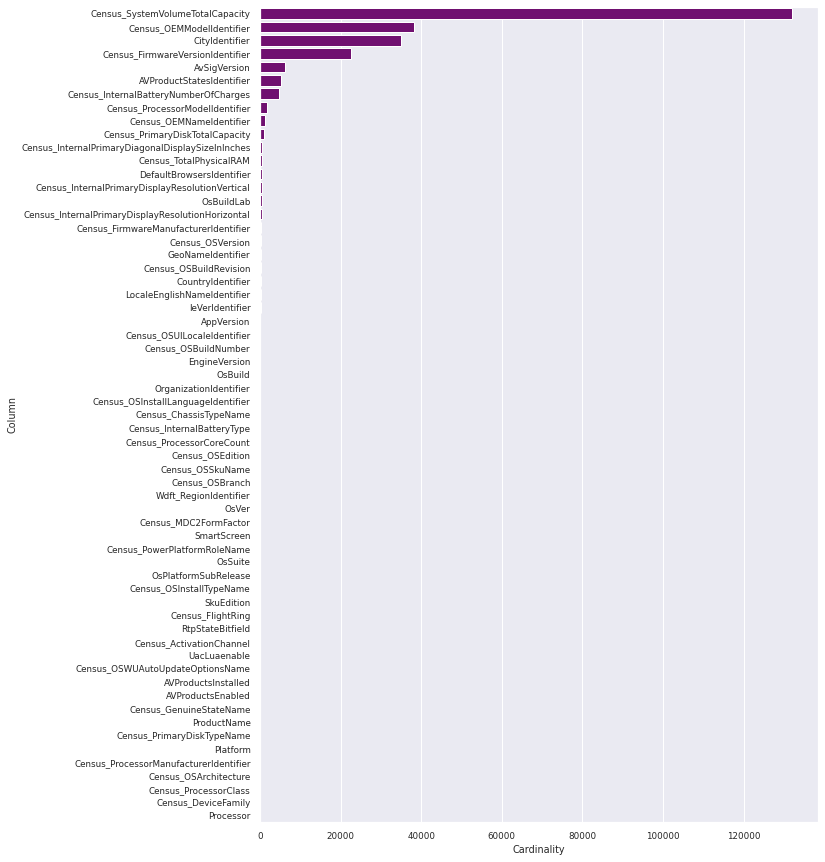

In [74]:
f, ax = plt.subplots(figsize=(10, 15))
sns.set_color_codes("muted")
sns.set(font_scale=1.2)
sns.barplot(x="Cardinality", y="Column", data=cardinality_df, label="Existing", color="Purple")
plt.show()

### **Dropping Features with High (> 500) Cardinality:**

In [75]:
high_cardinality_cols = [col for col in categorical_columns if train_data[col].nunique() > 500] 
high_cardinality_cols.remove('MachineIdentifier')  # Also Remove Machine IDs
train_data.drop(high_cardinality_cols, axis=1, inplace=True)
print('------------------------------------------------------------------------------------------')
print('Columns with High Cardinality: ')
print('------------------------------------------------------------------------------------------')
high_cardinality_cols


------------------------------------------------------------------------------------------
Columns with High Cardinality: 
------------------------------------------------------------------------------------------


['AvSigVersion',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'CityIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_FirmwareVersionIdentifier']

### **Dropping Features having Missing Values > 40%**

In [76]:
high_null_cols = [col for col in train_data.columns if train_data[col].count() < len(train_data)*0.6]
train_data.drop(high_null_cols, axis=1, inplace=True)
print('------------------------------------------------------------------------------------------')
print('Columns with > 40% Missing Values: ')
print('------------------------------------------------------------------------------------------')
high_null_cols

------------------------------------------------------------------------------------------
Columns with > 40% Missing Values: 
------------------------------------------------------------------------------------------


['PuaMode',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled']

### **Checking Data Balance**

------------- Distribution of Class in the Label Column -------------
1    223686
0    222388
Name: HasDetections, dtype: int64
----------------------------


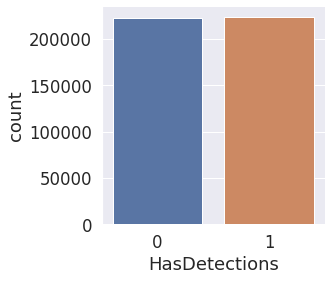

In [77]:
def check_class_bias():
    print('------------- Distribution of Class in the Label Column -------------')
    
    item_counts = train_data["HasDetections"].value_counts()
    print(item_counts)
    print ('----------------------------')

    sns.set(font_scale=1.5)
    f, ax = plt.subplots(figsize=(4, 4))
    ax = sns.countplot(x="HasDetections", data=train_data, label="Label Count")
    sns.despine(bottom=True)

check_class_bias()

### **Checking Feature Correlation**

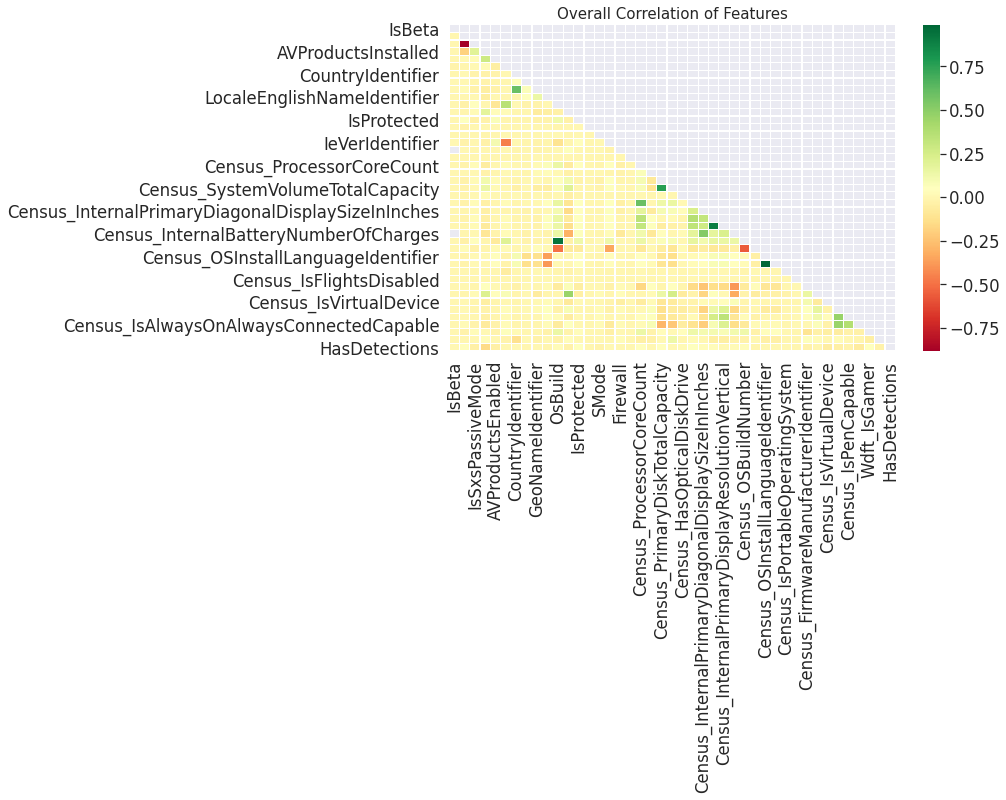

In [78]:
def correlation_check():
    corr = train_data.corr()
    half = np.zeros_like(corr, dtype=np.bool)
    half[np.triu_indices_from(half)] = True
    sns.set(font_scale=1.5)
    plt.figure(figsize=(10, 6))
    plt.title('Overall Correlation of Features', fontsize=15)
    sns.heatmap(corr, mask=half, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':12})
    plt.show()

correlation_check()

### **Feature Correlation Against Target Column 'HasDetections'**

In [79]:
pd.set_option('display.max_rows', 500)
print("Correlation of Each Feature Against Target Feature")
print('------------------------------------------------------------------------------------------')
corr = train_data[train_data.columns[1:]].corr()["HasDetections"][:]
corr = corr.sort_values(ascending = False)
corr = corr.to_frame()
corr.columns =['Correlation']
print(corr)
print('------------------------------------------------------------------------------------------')
#corr = corr.sort_values('Correlation', ascending=True)
# print(train_data[train_data.columns[1:]].corr()["HasDetections"][:])


Correlation of Each Feature Against Target Feature
------------------------------------------------------------------------------------------
                                                   Correlation
HasDetections                                         1.000000
IsProtected                                           0.056047
Census_TotalPhysicalRAM                               0.055272
Wdft_IsGamer                                          0.054686
Census_ProcessorCoreCount                             0.052014
Census_PrimaryDiskTotalCapacity                       0.049282
RtpStateBitfield                                      0.042950
Census_InternalPrimaryDiagonalDisplaySizeInInches     0.034300
Census_OSBuildNumber                                  0.030736
Census_InternalPrimaryDisplayResolutionHorizontal     0.030687
OsBuild                                               0.026482
Census_HasOpticalDiskDrive                            0.022088
Census_InternalBatteryNumberOfCharges  

###**Checking Skewness of Numerical Features**

In [80]:
from scipy.stats import norm, skew

def skewness_check():
    skewed_column = []
    skew_df = []
    for col in numerical_float_columns:
        # print(col)
        train_data[col] = train_data[col].astype('float32')
        cur_skew = train_data[col].skew()
        cur_kurt = train_data[col].kurt()
        # print(cur_skew)
        skew_df.append([col, cur_skew, cur_kurt])
        if cur_skew >= 2:
            skewed_column.append(col)
#         print(X[col].kurt())
    
    skew_df = pd.DataFrame(skew_df, columns=['Feature', 'Skewness', 'Kurt']).sort_values("Skewness", ascending=False)
    print(skew_df)
    return skewed_column

skewed_column = skewness_check()

                                             Feature   Skewness         Kurt
3                            Census_TotalPhysicalRAM  18.131203  1721.433716
4  Census_InternalPrimaryDiagonalDisplaySizeInInches   5.286043    44.349960
0                          Census_ProcessorCoreCount   3.734769    47.743305
2                   Census_SystemVolumeTotalCapacity   3.032057   111.429230
6    Census_InternalPrimaryDisplayResolutionVertical   2.813732    12.952002
5  Census_InternalPrimaryDisplayResolutionHorizontal   2.462671    12.683657
1                    Census_PrimaryDiskTotalCapacity   2.462269    83.202484
7              Census_InternalBatteryNumberOfCharges   1.084544    -0.823768


### **Plotting Skewness of Numerical Features**

<Figure size 432x288 with 0 Axes>

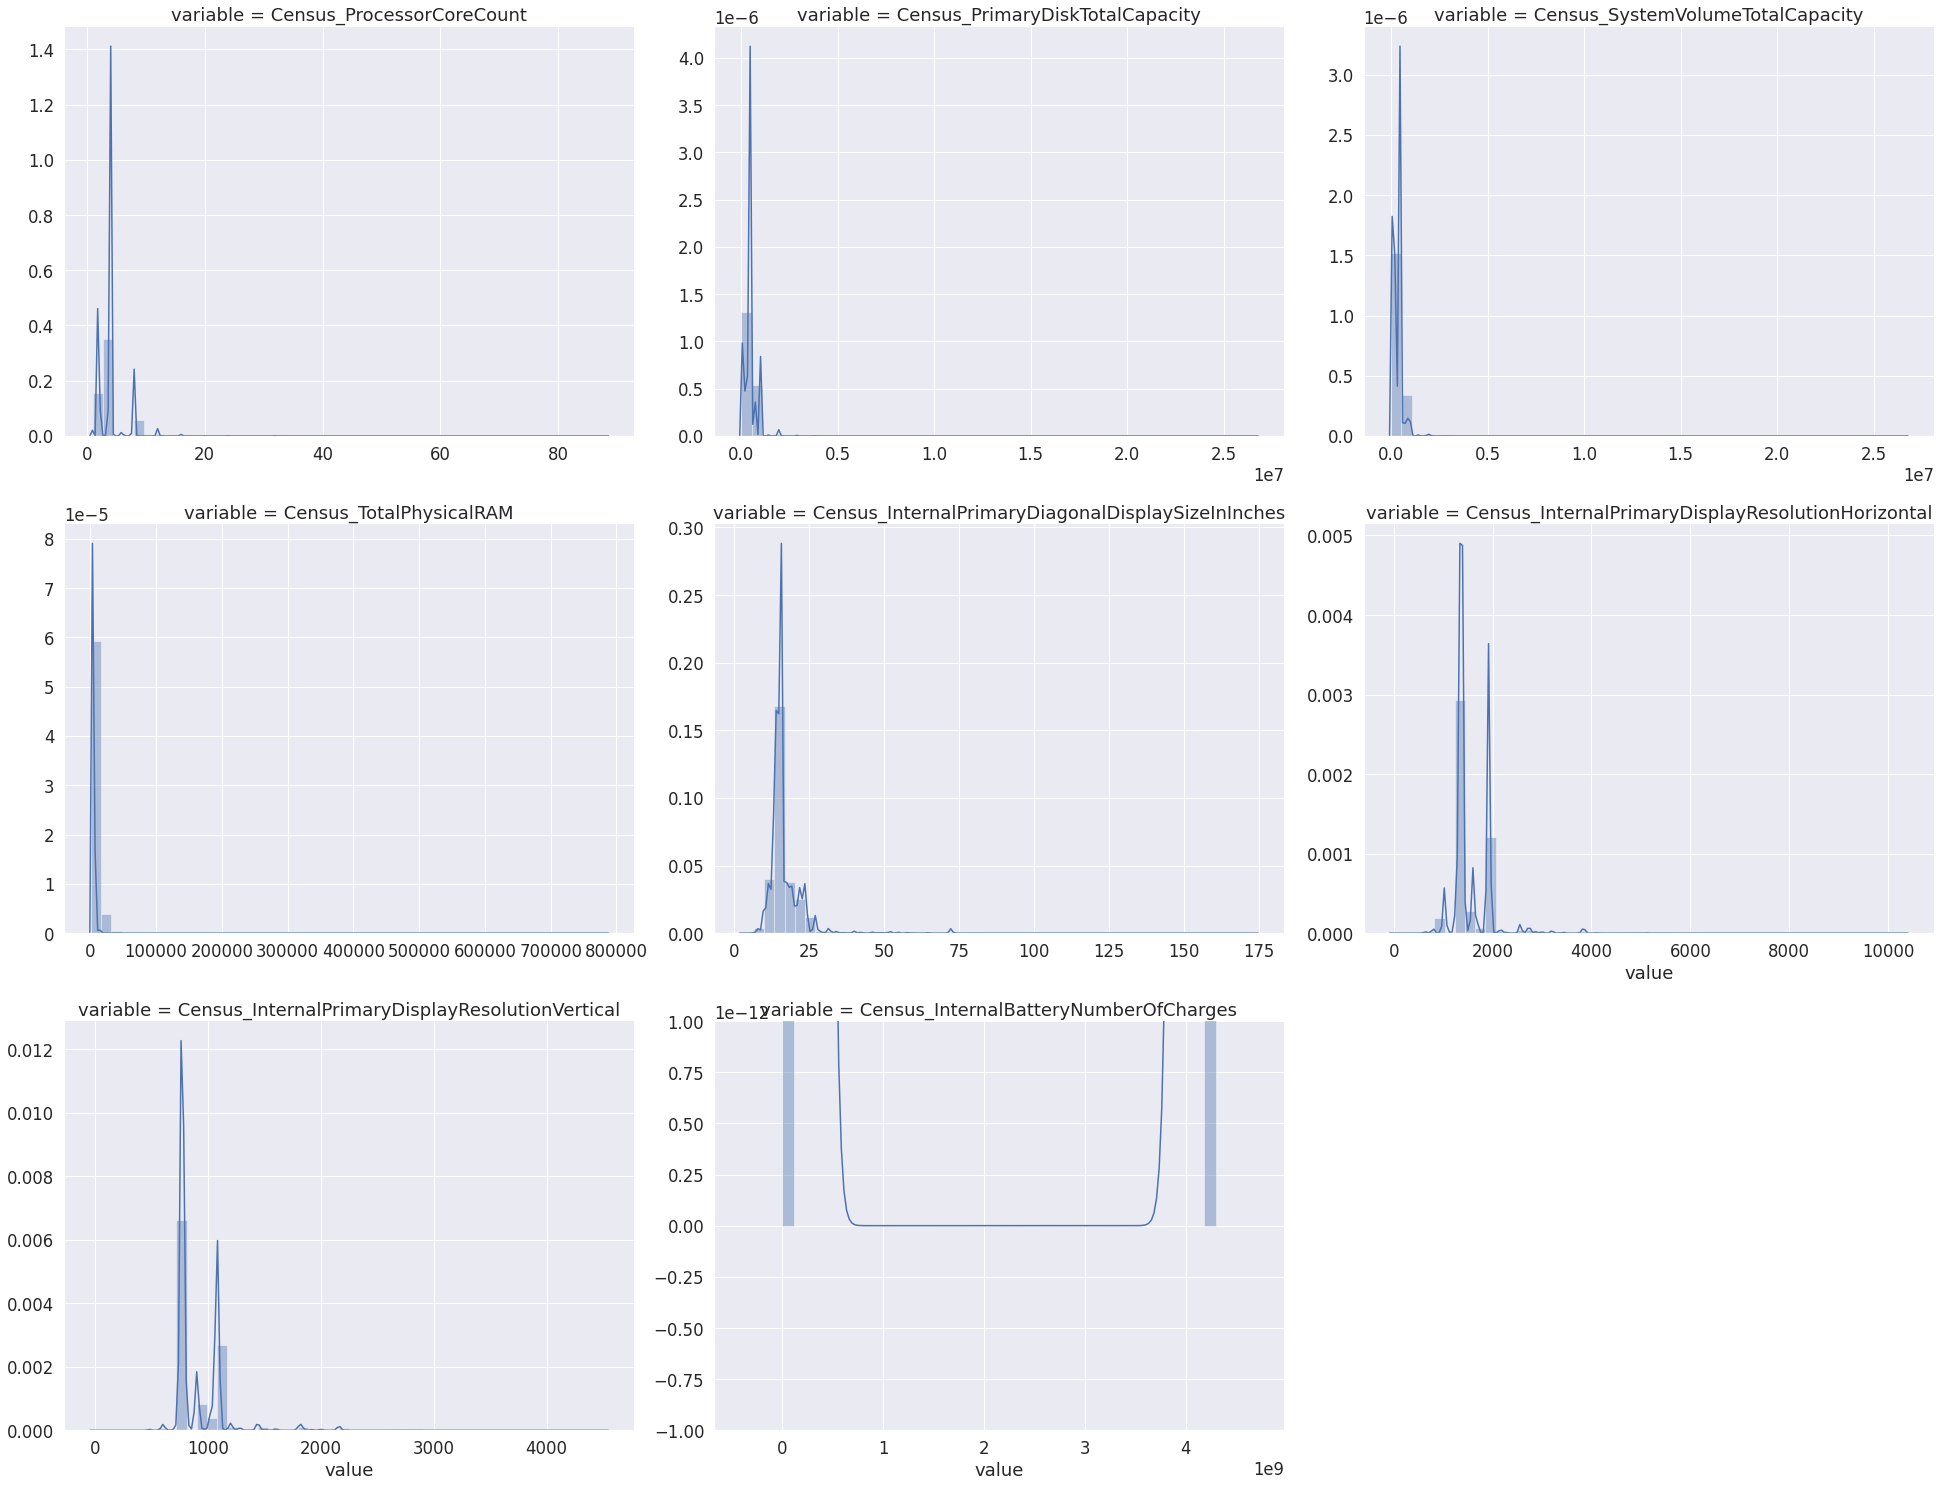

In [81]:
def skewness_plot(numerical_float_columns):
    num = pd.melt(train_data, value_vars = numerical_float_columns)
    plt.subplots_adjust(hspace=30, wspace=30)
    # plt.tight_layout()
    fig_dims = (6, 4)
    n_p = sns.FacetGrid (num, col='variable', col_wrap=3, height = 7, aspect = 1.3, sharex=False, sharey = False)
    n_p.map(sns.distplot, 'value')
    
    # for col in numerical_float_columns:
    # # for col in X.columns:
    #     num = pd.melt(train_data, value_vars = col)
    #     sns.set(font_scale=1.3)
    #     n_p = sns.FacetGrid (num, col='variable', col_wrap=10, sharex=False, sharey = False)
    #     n_p.map(sns.distplot, 'value')

skewness_plot(numerical_float_columns)

### **Dropping Null rows in Numerical Columns**

In [82]:
train_data.dropna(subset = numerical_float_columns, inplace=True)

### **Creating Test and Train Dataset**

In [83]:
labels = train_data['HasDetections']
train_data.drop('HasDetections', axis=1, inplace=True)
X_train, X_val, Y_train, Y_val = train_test_split(train_data, labels, test_size=0.15,random_state=12345)

In [84]:
gc.collect()

45181

### **Converting Categorical Features into Numerical Features using Label Encoder**

In [85]:
binary_columns, numerical_float_columns, categorical_columns = segregate_features()

lencoder = {}
for col in categorical_columns:
    _, lencoder[col] = pd.factorize(X_train[col])
    
for col in categorical_columns:
    X_train[col] = lencoder[col].get_indexer(X_train[col])
    X_val[col] = lencoder[col].get_indexer(X_val[col])

bincoder = {}
for col in binary_columns:
    if col != 'HasDetections':
      _, bincoder[col] = pd.factorize(X_train[col])
    
for col in binary_columns:
    if col != 'HasDetections':
      X_train[col] = bincoder[col].get_indexer(X_train[col])
      X_val[col] = bincoder[col].get_indexer(X_val[col])

In [86]:
gc.collect()

50

In [87]:
# print(X_train.head())
# print(Y_train.head())
# np.isnan(X_train.values.any())
# np.where(np.isnan(X_train))
# print(display_missing_values(X_train))
# print(binary_columns)

# **Feature Importance Analysis**

### **Using Logistic Regression**
Feature importance score too small, so doesn't hold any significance, not considereing this in the pipeline

Feature: 0, Score: -0.00000
Feature: 1, Score: -0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: -0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: -0.00000
Feature: 10, Score: -0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: -0.00000
Feature: 13, Score: -0.00000
Feature: 14, Score: -0.00000
Feature: 15, Score: -0.00000
Feature: 16, Score: -0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: -0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: -0.00000
Feature: 23, Score: -0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: -0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: -0.00000
Feature: 28, Score: -0.00000
Feature: 29, Score: -0.00000
Feature: 30, Score: -0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: -0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: -0.00000
Feat

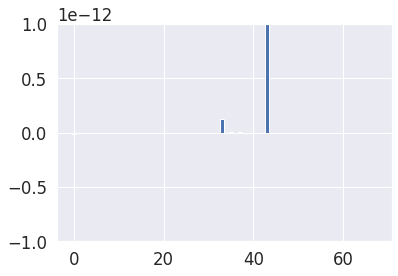

In [88]:
### Logistic Regression Feature Importance
LR_imp_feature_list = {}
model = LogisticRegression()
# fit the model
model.fit(X_train, Y_train)

# get importance
importance = model.coef_[0]
# summarize feature importance

cols = X_train.columns

for i,v in enumerate(importance):
	#print('Feature: %0d, Score: %.5f' % (i,v))
  LR_imp_feature_list[cols[i]] = v
  print('Feature: %0d, Score: %.5f' % (i,v))

print(LR_imp_feature_list)
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


### **Using Decision Tree**

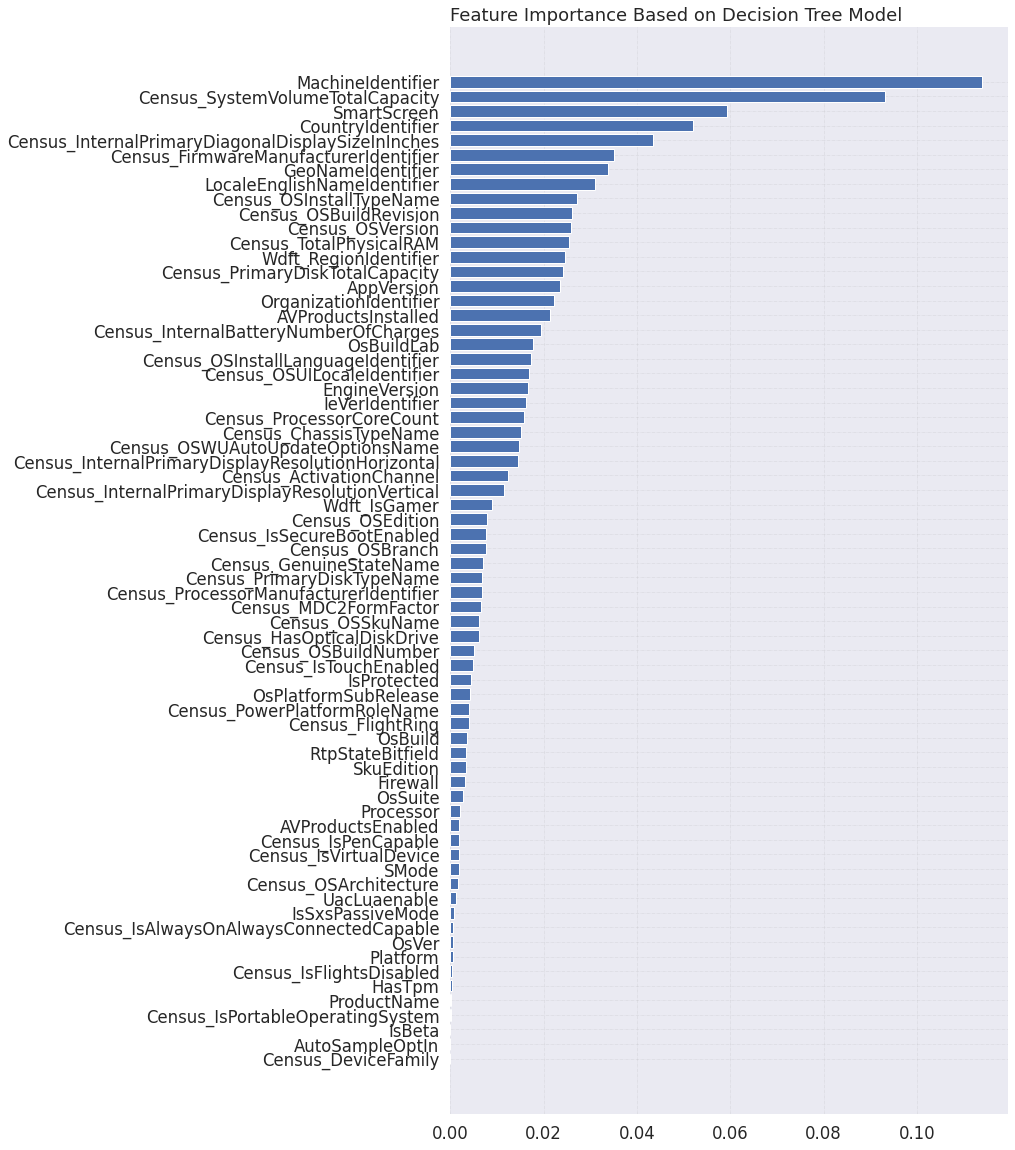

In [89]:
### Decision Tree Feature Importance
DT_imp_feature_list = {}

model = DecisionTreeClassifier()
# fit the model
model.fit(X_train, Y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance

cols = X_train.columns

for i,v in enumerate(importance):
  DT_imp_feature_list[cols[i]] = v
  # print('Feature: %0d, Score: %.5f' % (i,v))
 
# print(DT_imp_feature_list)
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

sorted_DT_imp_feature_list = sorted(DT_imp_feature_list.items(), key=lambda item: item[1], reverse=True)
# print(sorted_DT_imp_feature_list)

## Plotting Barplot of Decision Tree

features_sorted = []
importance_sorted = []

for i in sorted_DT_imp_feature_list:
    features_sorted += [i[0]]
    importance_sorted += [i[1]]

# print(features_sorted)
# print(importance_sorted)
fig, ax = plt.subplots(figsize =(10, 20))

# Horizontal Bar Plot
ax.barh(features_sorted,importance_sorted)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)
 
# Increase Fontsize
# ax.set_xlabel(xlabel = None, fontsize=15)
# ax.set_ylabel(ylabel = None, fontsize=5)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add Plot Title
ax.set_title('Feature Importance Based on Decision Tree Model',
             loc ='left', ) 
# Show Plot
plt.show()

### **Using Random Forest**

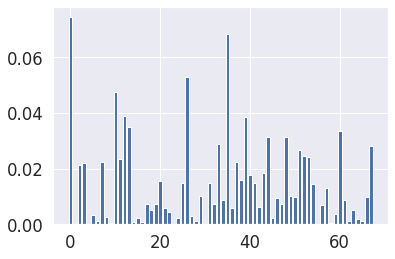

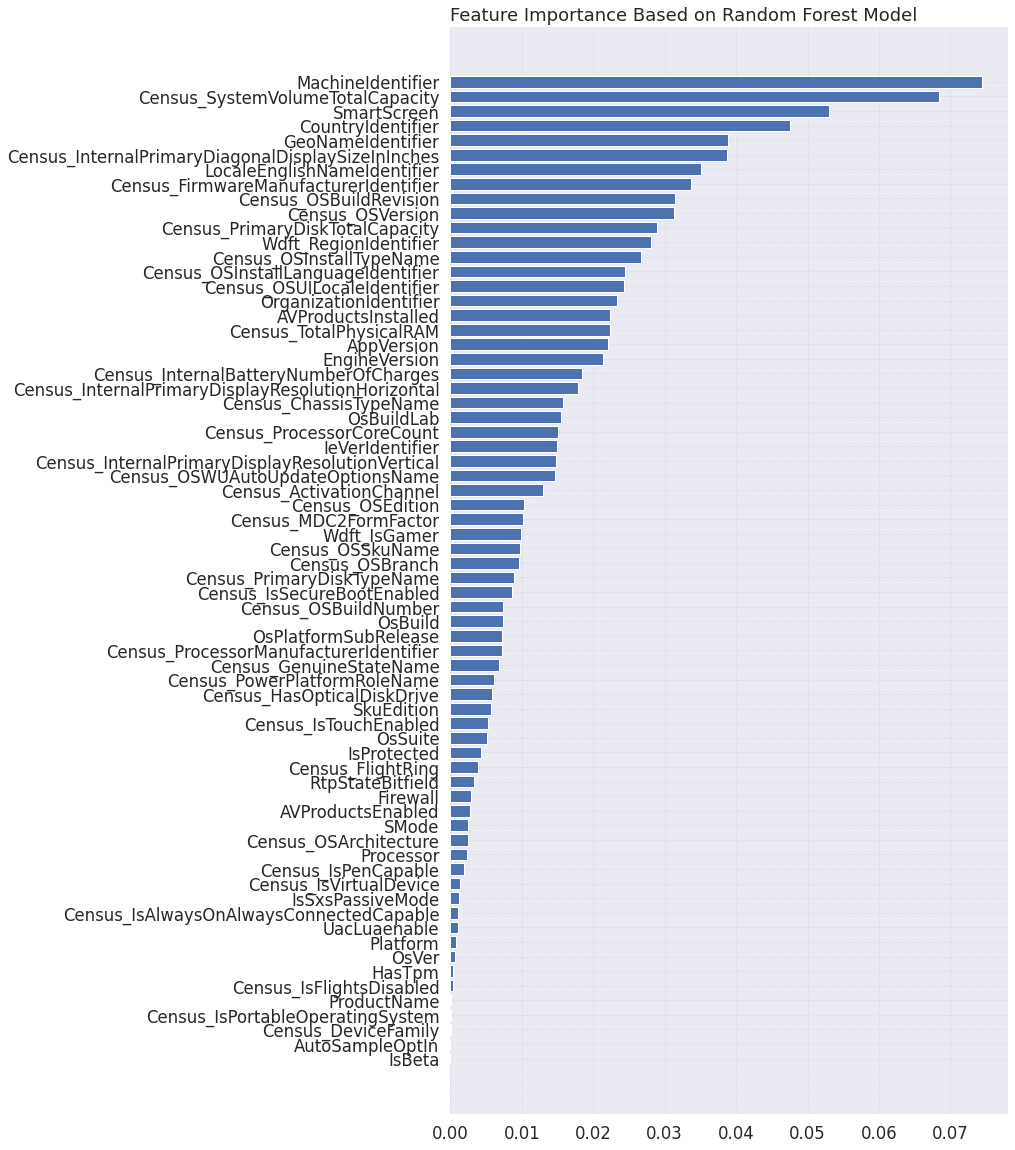

In [90]:
## Random Forest Feature Importance
RT_imp_feature_list = {}

model = RandomForestClassifier()
# fit the model
model.fit(X_train, Y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
# print(X_train.shape)
# cols = X_train.columns
# print(len(cols))

for i,v in enumerate(importance):
  RT_imp_feature_list[cols[i]] = v
  # print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

# print(RT_imp_feature_list)
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

sorted_RT_imp_feature_list = sorted(RT_imp_feature_list.items(), key=lambda item: item[1], reverse=True)
# print(sorted_RT_imp_feature_list)

# Plotting Barplot of Decision Tree

features_sorted = []
importance_sorted = []

for i in sorted_RT_imp_feature_list:
    features_sorted += [i[0]]
    importance_sorted += [i[1]]

# print(features_sorted)
# print(importance_sorted)
fig, ax = plt.subplots(figsize =(10, 20))

# Horizontal Bar Plot
ax.barh(features_sorted,importance_sorted)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)
 
# Increase Fontsize
ax.set_xlabel(xlabel = None, fontsize=15)
ax.set_ylabel(ylabel = None, fontsize=5)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add Plot Title
ax.set_title('Feature Importance Based on Random Forest Model',
             loc ='left', ) 
# Show Plot
plt.show()


### **Using XGBoost**

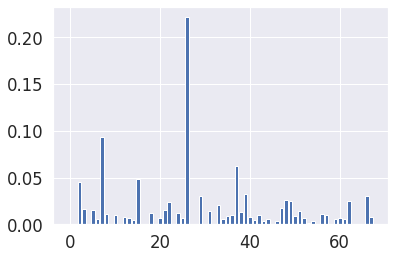

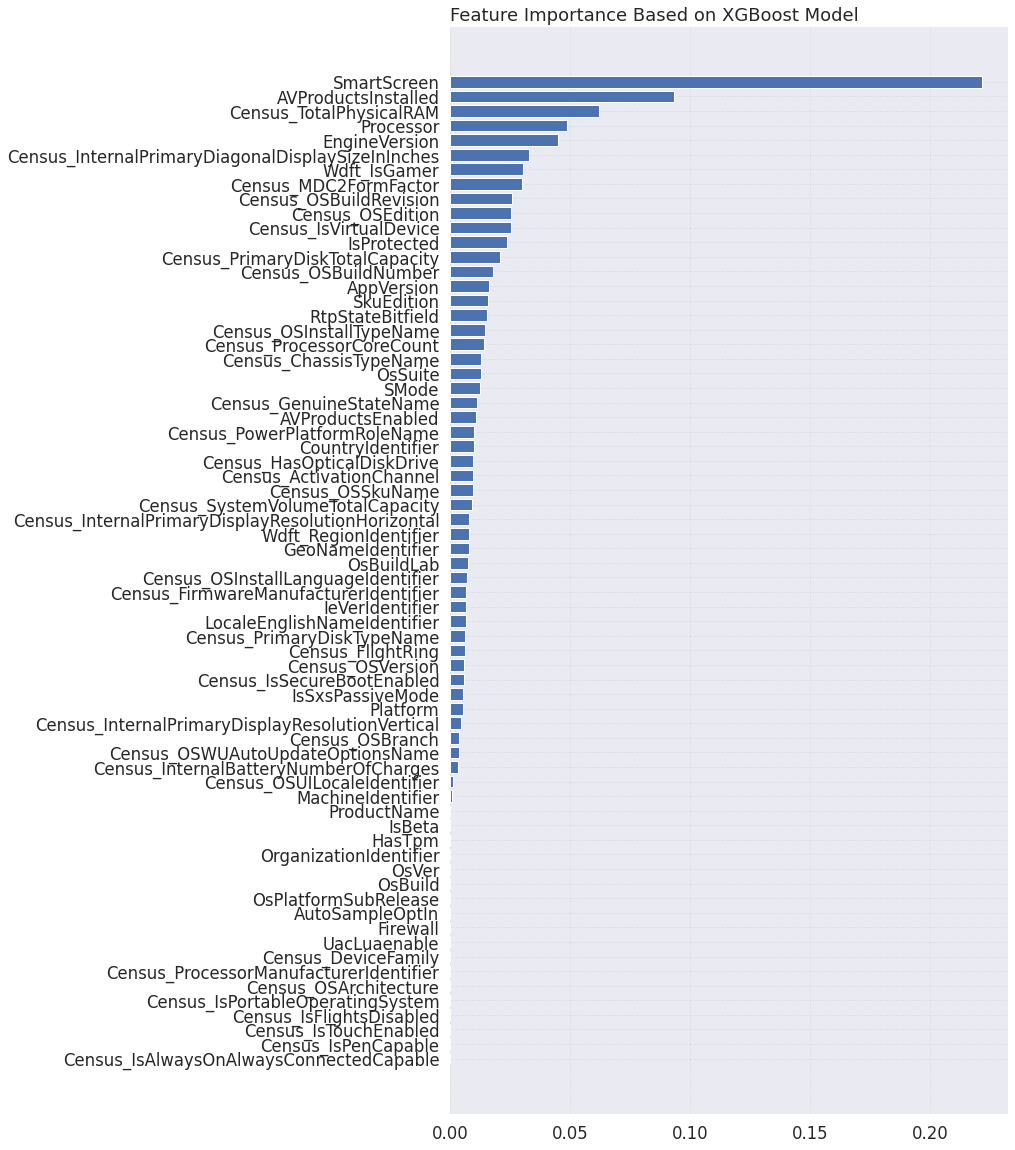

In [91]:
## XGBoost Feature Importance
XG_imp_feature_list = {}

model = XGBClassifier()
# fit the model
model.fit(X_train, Y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  XG_imp_feature_list[cols[i]] = v
  # print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

# print(XG_imp_feature_list)
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

sorted_XG_imp_feature_list = sorted(XG_imp_feature_list.items(), key=lambda item: item[1], reverse=True)
# print(sorted_XG_imp_feature_list)

# Plotting Barplot of Decision Tree

features_sorted = []
importance_sorted = []

for i in sorted_XG_imp_feature_list:
    features_sorted += [i[0]]
    importance_sorted += [i[1]]

# print(features_sorted)
# print(importance_sorted)
fig, ax = plt.subplots(figsize =(10, 20))

# Horizontal Bar Plot
ax.barh(features_sorted,importance_sorted)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)
 
# Increase Fontsize
# ax.set_xlabel(xlabel = None, fontsize=15)
# ax.set_ylabel(ylabel = None, fontsize=5)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add Plot Title
ax.set_title('Feature Importance Based on XGBoost Model',
             loc ='left', ) 
# Show Plot
plt.show()

### **Using LGBM**

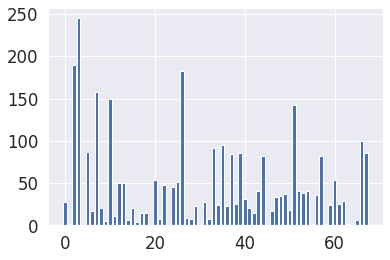

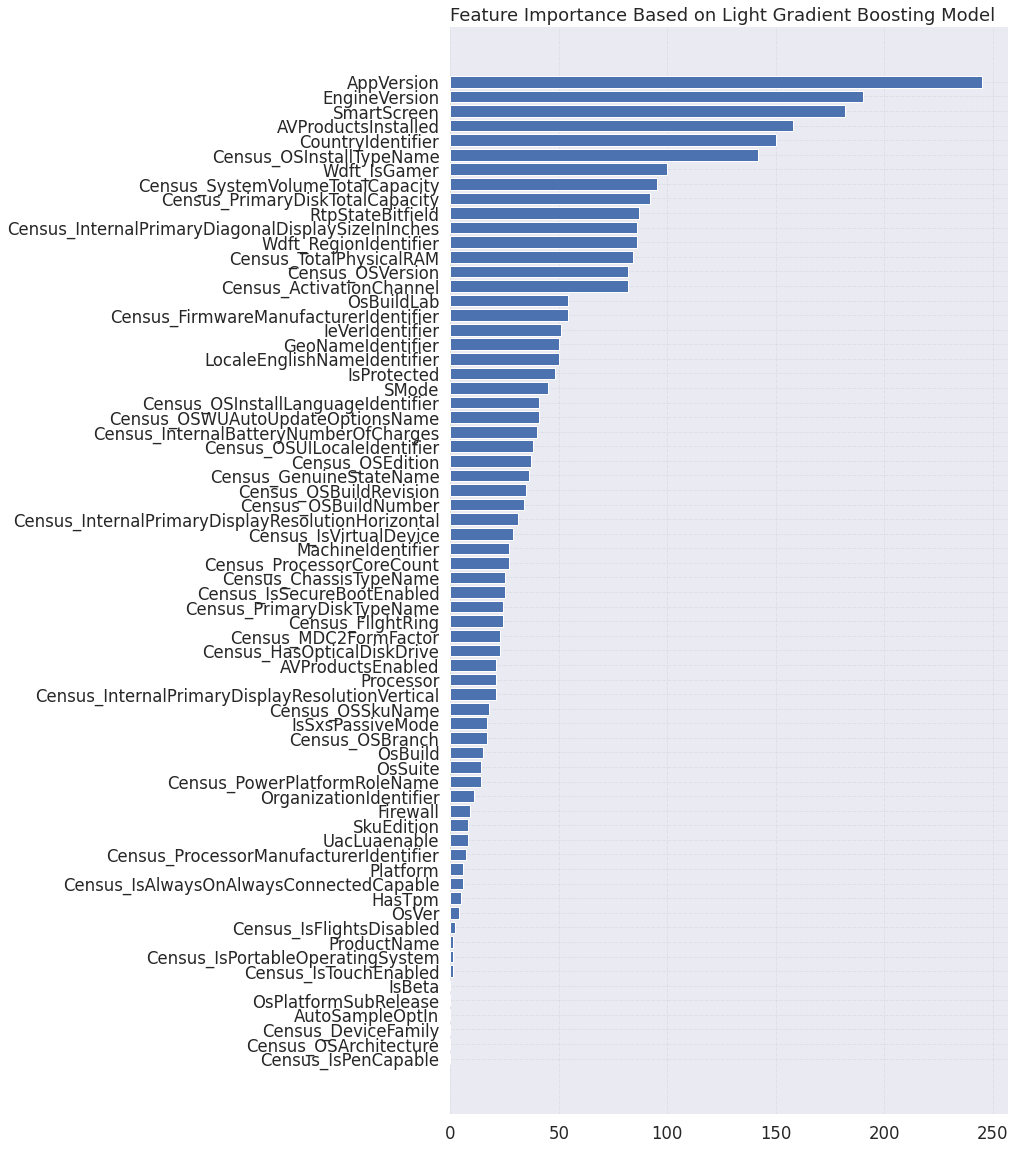

In [92]:
## LGBoost Feature Importance
LG_imp_feature_list = {}

model = lgb.LGBMClassifier()
# fit the model
model.fit(X_train, Y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  LG_imp_feature_list[cols[i]] = v
  # print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

# print(LG_imp_feature_list)
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

sorted_LG_imp_feature_list = sorted(LG_imp_feature_list.items(), key=lambda item: item[1], reverse=True)
# print(sorted_LG_imp_feature_list)

# Plotting Barplot of Decision Tree

features_sorted = []
importance_sorted = []

for i in sorted_LG_imp_feature_list:
    features_sorted += [i[0]]
    importance_sorted += [i[1]]

# print(features_sorted)
# print(importance_sorted)
fig, ax = plt.subplots(figsize =(10, 20))

# Horizontal Bar Plot
ax.barh(features_sorted,importance_sorted)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)
 
# Increase Fontsize
# ax.set_xlabel(xlabel = None, fontsize=15)
# ax.set_ylabel(ylabel = None, fontsize=5)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add Plot Title
ax.set_title('Feature Importance Based on Light Gradient Boosting Model',
             loc ='left', ) 
# Show Plot
plt.show()

### **Generating Most Important Feature List**

In [93]:
Final_DT_imp_feature_list = []

for i in range(0, len(sorted_DT_imp_feature_list)):
  if(sorted_DT_imp_feature_list[i][1] > 0.0001):
    Final_DT_imp_feature_list.append(sorted_DT_imp_feature_list[i][0])

Final_RT_imp_feature_list = []
for i in range(0, len(sorted_RT_imp_feature_list)):
  if(sorted_RT_imp_feature_list[i][1] > 0.0001):
    Final_RT_imp_feature_list.append(sorted_RT_imp_feature_list[i][0])

Final_XG_imp_feature_list = []
for i in range(0, len(sorted_XG_imp_feature_list)):
  if(sorted_XG_imp_feature_list[i][1] > 0.0001):
    Final_XG_imp_feature_list.append(sorted_XG_imp_feature_list[i][0])

Final_LG_imp_feature_list = []
for i in range(0, len(sorted_LG_imp_feature_list)):
  if(sorted_LG_imp_feature_list[i][1] > 0):
    Final_LG_imp_feature_list.append(sorted_LG_imp_feature_list[i][0])

# print(Final_DT_imp_feature_list)
# print(Final_RT_imp_feature_list)
# print(Final_XG_imp_feature_list)
# print(Final_LG_imp_feature_list)


def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

temp_intersec1 = intersection(Final_DT_imp_feature_list, Final_RT_imp_feature_list)
temp_intersec2 = intersection(temp_intersec1, Final_XG_imp_feature_list)
final_intersec = intersection(temp_intersec2, Final_LG_imp_feature_list)
print(final_intersec)
len(final_intersec)

['MachineIdentifier', 'Census_SystemVolumeTotalCapacity', 'SmartScreen', 'CountryIdentifier', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_FirmwareManufacturerIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Census_OSInstallTypeName', 'Census_OSBuildRevision', 'Census_OSVersion', 'Census_TotalPhysicalRAM', 'Wdft_RegionIdentifier', 'Census_PrimaryDiskTotalCapacity', 'AppVersion', 'AVProductsInstalled', 'Census_InternalBatteryNumberOfCharges', 'OsBuildLab', 'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier', 'EngineVersion', 'IeVerIdentifier', 'Census_ProcessorCoreCount', 'Census_ChassisTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_ActivationChannel', 'Census_InternalPrimaryDisplayResolutionVertical', 'Wdft_IsGamer', 'Census_OSEdition', 'Census_IsSecureBootEnabled', 'Census_OSBranch', 'Census_GenuineStateName', 'Census_PrimaryDiskTypeName', 'Census_MDC2FormFactor', 'Census_OSSk

50

### **Generating Least Important Feature List**

In [94]:
Final_DT_non_imp_feature_list = []

for i in range(0, len(sorted_DT_imp_feature_list)):
  if(sorted_DT_imp_feature_list[i][1] <= 0.001):
    Final_DT_non_imp_feature_list.append(sorted_DT_imp_feature_list[i][0])

Final_RT_non_imp_feature_list = []
for i in range(0, len(sorted_RT_imp_feature_list)):
  if(sorted_RT_imp_feature_list[i][1] <= 0.0012):
    Final_RT_non_imp_feature_list.append(sorted_RT_imp_feature_list[i][0])

Final_XG_non_imp_feature_list = []
for i in range(0, len(sorted_XG_imp_feature_list)):
  if(sorted_XG_imp_feature_list[i][1] <= 0.001):
    Final_XG_non_imp_feature_list.append(sorted_XG_imp_feature_list[i][0])

Final_LG_non_imp_feature_list = []
for i in range(0, len(sorted_LG_imp_feature_list)):
  if(sorted_LG_imp_feature_list[i][1] <= 0):
    Final_LG_non_imp_feature_list.append(sorted_LG_imp_feature_list[i][0])


for i in range(3, len(sorted_DT_imp_feature_list)):
  Final_DT_non_imp_feature_list.append(sorted_DT_imp_feature_list[i][0])

Final_RT_non_imp_feature_list = []
for i in range(3, len(sorted_RT_imp_feature_list)):
  Final_RT_non_imp_feature_list.append(sorted_RT_imp_feature_list[i][0])

Final_XG_non_imp_feature_list = []
for i in range(3, len(sorted_XG_imp_feature_list)):
  Final_XG_non_imp_feature_list.append(sorted_XG_imp_feature_list[i][0])

Final_LG_non_imp_feature_list = []
for i in range(3, len(sorted_LG_imp_feature_list)):
  Final_LG_non_imp_feature_list.append(sorted_LG_imp_feature_list[i][0])

# print(Final_DT_non_imp_feature_list)
# print(Final_RT_non_imp_feature_list)
# print(Final_XG_non_imp_feature_list)
# print(Final_LG_non_imp_feature_list)

temp_intersec1 = intersection(Final_DT_non_imp_feature_list, Final_RT_non_imp_feature_list)
temp_intersec2 = intersection(temp_intersec1, Final_XG_non_imp_feature_list)
final_intersec = intersection(temp_intersec2, Final_LG_non_imp_feature_list)
print(final_intersec)
len(final_intersec)

['IsSxsPassiveMode', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'OsVer', 'Platform', 'Census_IsFlightsDisabled', 'HasTpm', 'ProductName', 'Census_IsPortableOperatingSystem', 'IsBeta', 'AutoSampleOptIn', 'Census_DeviceFamily', 'CountryIdentifier', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_FirmwareManufacturerIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Census_OSInstallTypeName', 'Census_OSBuildRevision', 'Census_OSVersion', 'Wdft_RegionIdentifier', 'Census_PrimaryDiskTotalCapacity', 'OrganizationIdentifier', 'Census_InternalBatteryNumberOfCharges', 'OsBuildLab', 'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier', 'IeVerIdentifier', 'Census_ProcessorCoreCount', 'Census_ChassisTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_ActivationChannel', 'Census_InternalPrimaryDisplayResolutionVertical', 'Wdft_IsGamer', 'Census_OSEdition', 'Census_IsSecureBootEnabled', 'Census_OSBranc

72

# **Implementing The Super Learner**

### **Data Preprocessing**

In [95]:
### Sampling Dataset
train_data = trainn_data.sample(frac=1)
train_data.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
8734028,fa9e2591e2a6885ef33883b7c3a1bf9f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1240.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,160,52868.0,NaN,204.0,-86,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4588.0,313586.0,4.0,5.0,...,HDD,702967.0,0,4096.0,Desktop,20.796875,1600.0,1200.0,Desktop,NaN,4.294967e+09,10.0.17134.165,x86,rs4_release,17134,165,Professional,PROFESSIONAL,Clean,29.0,125,FullAuto,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,142.0,3348.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
4179739,77ecec73860cc8e8bd93ac0703bbc149,win8defender,1.1.15200.1,4.18.1807.18075,1.275.46.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,165477.0,NaN,64.0,49,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2206.0,239746.0,4.0,5.0,...,SSD,241925.0,0,8192.0,Notebook,14.000000,1600.0,900.0,Mobile,NaN,0.000000e+00,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,Upgrade,8.0,31,FullAuto,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,500.0,14317.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
1067492,1ea9d1457e5eb468d426e0492ac2dd9d,win8defender,1.1.13504.0,4.11.15063.0,1.237.0.0,0,7.0,0,3196.0,62060.0,2.0,1.0,1,66,113558.0,27.0,89.0,88,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,0.0,0,NaN,NaN,105.0,NaN,1.0,1.0,Notebook,Windows.Desktop,525.0,331389.0,4.0,5.0,...,HDD,952792.0,0,8192.0,Notebook,17.203125,1600.0,900.0,Mobile,NaN,0.000000e+00,10.0.15063.250,amd64,rs2_release,15063,250,Core,CORE,Other,14.0,49,Notify,0,OFFLINE,OEM:DM,NaN,0.0,Unknown,NaN,142.0,70647.0,1,NaN,0.0,0,0,0.0,NaN,NaN,0
2123704,3cf2449c2377f53abc65c3251bba71b7,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1691.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,89,142110.0,27.0,120.0,6,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,NaN,0.0,105.0,NaN,1.0,1.0,Notebook,Windows.Desktop,525.0,331265.0,2.0,1.0,...,HDD,524281.0,0,4096.0,Notebook,15.500000,1366.0,768.0,Mobile,NaN,2.900000e+01,10.0.15063.1324,amd64,rs2_release,15063,1324,CoreSingleLanguage,CORE_SINGLELANGUAGE,Reset,8.0,31,Notify,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,142.0,70210.0,1,NaN,0.0,0,0,0.0,1.0,1.0,1
700333

In [96]:
gc.collect()

27430

In [97]:
def segregate_features():
    binary = [col for col in train_data.columns if train_data[col].nunique() == 2]
    numerical_floats = ['Census_ProcessorCoreCount',
                        'Census_PrimaryDiskTotalCapacity',
                        'Census_SystemVolumeTotalCapacity',
                        'Census_TotalPhysicalRAM',
                        'Census_InternalPrimaryDiagonalDisplaySizeInInches',
                        'Census_InternalPrimaryDisplayResolutionHorizontal',
                        'Census_InternalPrimaryDisplayResolutionVertical',
                        'Census_InternalBatteryNumberOfCharges']
    categorical = [col for col in train_data.columns if (col not in numerical_floats) & (col not in binary)]
    return binary, numerical_floats, categorical
    
binary_columns, numerical_float_columns, categorical_columns = segregate_features()

In [98]:
gc.collect()

50

In [99]:
total = train_data.shape[0]
missing_df = []
cardinality_df = []
for col in train_data.columns:
    missing_df.append([col, train_data[col].count(), total])
    cardinality = train_data[col].nunique()
    if cardinality > 2 and col != 'MachineIdentifier':
        cardinality_df.append([col, cardinality])
    
missing_df = pd.DataFrame(missing_df, columns=['Column', 'Number of records', 'Total']).sort_values("Number of records", ascending=False)
cardinality_df = pd.DataFrame(cardinality_df, columns=['Column', 'Cardinality']).sort_values("Cardinality", ascending=False)
type_df = [['Binary columns', len(binary_columns)], ['Numerical columns', len(numerical_float_columns)], ['Categorical columns', len(categorical_columns)]]

type_df = pd.DataFrame(type_df, columns=['Type', 'Column Count']).sort_values('Column Count', ascending=True)

In [100]:
high_cardinality_cols = [col for col in categorical_columns if train_data[col].nunique() > 500] 
high_cardinality_cols.remove('MachineIdentifier')  # Also Remove Machine IDs
train_data.drop(high_cardinality_cols, axis=1, inplace=True)
print('Columns with High Cardinality: \n')
high_cardinality_cols

Columns with High Cardinality: 



['AvSigVersion',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'CityIdentifier',
 'OsBuildLab',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier']

In [101]:
high_null_cols = [col for col in train_data.columns if train_data[col].count() < len(train_data)*0.6]
train_data.drop(high_null_cols, axis=1, inplace=True)
print('Columns with > 40% Missing Values: \n')
high_null_cols

Columns with > 40% Missing Values: 



['PuaMode',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled']

In [102]:
## Dropping 10 features ###

useless_cols = ['MachineIdentifier', 'Census_IsPenCapable', 'Census_OSArchitecture', 'Census_IsFlightsDisabled', 'OsVer', 'Census_IsPortableOperatingSystem', 'ProductName', 'Census_DeviceFamily', 'AutoSampleOptIn', 'IsBeta']
train_data.drop(useless_cols, axis=1, inplace=True)

In [103]:
# train_data.dropna(subset = numerical_float_columns, inplace=True)

train_data.dropna(inplace=True)

In [104]:
labels = train_data['HasDetections']
train_data.drop('HasDetections', axis=1, inplace=True)
X_train, X_val, Y_train, Y_val = train_test_split(train_data, labels, test_size=0.15,random_state=12345)

In [105]:
binary_columns, numerical_float_columns, categorical_columns = segregate_features()

# Label encoder
lencoder = {}
for col in categorical_columns:
    _, lencoder[col] = pd.factorize(X_train[col])
    
for col in categorical_columns:
    X_train[col] = lencoder[col].get_indexer(X_train[col])
    X_val[col] = lencoder[col].get_indexer(X_val[col])

# bincoder = {}
# for col in binary_columns:
#     if col != 'HasDetections':
#       _, bincoder[col] = pd.factorize(X_train[col])
    
# for col in binary_columns:
#     if col != 'HasDetections':
#       X_train[col] = bincoder[col].get_indexer(X_train[col])
#       X_val[col] = bincoder[col].get_indexer(X_val[col])

In [106]:
gc.collect()

50

### **Outlier Detection using Z-score**

In [107]:
# X = pd.concat([X_train, Y_train], axis=1)
# print(X.head())
# # print(X.shape)
# X = X[(np.abs(stats.zscore(X)) < 10).all(axis=1)]


# print(X.shape)
# Y_train = X['HasDetections']
# X.drop('HasDetections', axis=1, inplace=True)
# X_train = X.copy()
# print(X_train.shape)
# print(Y_train.shape)
# # print(X_train.head())
# # print(Y_train.head())

In [108]:
gc.collect()

100

In [109]:
 ### Model 1### 
 ### GBM ###

from sklearn.ensemble import GradientBoostingClassifier

model_1= GradientBoostingClassifier(n_estimators=20, learning_rate=1,max_depth=5,validation_fraction=0.2, random_state=2,verbose=2)

In [110]:
### Model 2### 
 ### LGBM ###

from lightgbm import LGBMClassifier

# model_2 = xgb.train(params, lgb_train, verbose_eval=100)
model_2= LGBMClassifier(num_leaves=60,
         min_data_in_leaf=100, 
         objective='binary',
         max_depth=-1,
         learning_rate=0.1,
         boosting="gbdt",
         feature_fraction=0.8,
         bagging_freq=1,
         bagging_fraction=0.8 ,
         bagging_seed=42,
         metric='auc',
         lambda_l1=0.1,
         random_state=12345,
         verbosity=-1)
# model_2.fit(X_train, Y_train)

In [111]:
### Model 3### 
 ### XGBM ##

from xgboost import XGBClassifier
import xgboost as xgb

# model_2 = xgb.train(params, lgb_train, verbose_eval=100)
model_3= xgb.XGBClassifier(max_depth = 5,
                         learning_rate = 0.01, 
                         n_estimators = 250, reg_alpha = 1.1, colsample_bytree = 0.9, subsample = 0.9,
                         n_jobs = 5)
# model_2.fit(X_train, Y_train)

In [112]:
### Model 4 ### 
 ### CatBoosting ##

import catboost as cb
model_4 = cb.CatBoostClassifier(depth = 9, reg_lambda=0.1,
                         learning_rate = 0.09, 
                         iterations = 500)
#model_4.fit(X_train, Y_train, eval_set=[(X_val,Y_val)],  verbose=2, early_stopping_rounds=50);
# model_4.fit(X_train, Y_train,  verbose=2);

In [113]:
### Model 5 ### 
 ### AdaBoosting ##

from sklearn.ensemble import AdaBoostClassifier

model_5= AdaBoostClassifier(n_estimators=20, learning_rate=1, random_state=2)

In [114]:
model_6=RandomForestClassifier(n_estimators=100)

In [115]:
print(X_val.head())

         EngineVersion  AppVersion  ...  Wdft_IsGamer  Wdft_RegionIdentifier
8866054              0           0  ...           1.0                      4
7417296              0           1  ...           1.0                     12
337713               2           1  ...           1.0                      1
805890               2           6  ...           0.0                      4
8721567              0           1  ...           0.0                      5

[5 rows x 56 columns]


In [116]:
# # # create a list of base-models

def get_models():
	models = list()
	models.append(model_1)
	models.append(model_2)
	models.append(model_3)
	models.append(model_4)
	# models.append(model_5)
	# models.append(model_6)
	return models
 
# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
	meta_X, meta_y = list(), list()
	# define split of data
	kfold = KFold(n_splits=5, shuffle=True)
	# enumerate splits
	for train_ix, test_ix in kfold.split(X):
		fold_yhats = list()
		# get data
		train_X, test_X = X[train_ix], X[test_ix]
		train_y, test_y = y[train_ix], y[test_ix]
		meta_y.extend(test_y)
		# fit and make predictions with each sub-model
		for model in models:
			model.fit(train_X, train_y)
			yhat = model.predict_proba(test_X)
			# store columns
			fold_yhats.append(yhat)
		# store fold yhats as columns
		meta_X.append(hstack(fold_yhats))
	return vstack(meta_X), asarray(meta_y)
 
# fit all base models on the training dataset
def fit_base_models(X, y, models):
	for model in models:
		model.fit(X, y)
 
# fit a meta model
# def fit_meta_model(X, y):
# 	model = LogisticRegression(solver='liblinear')
# 	model.fit(X, y)
# 	return model
 
# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
	for model in models:
		yhat = model.predict(X)
		acc = accuracy_score(y, yhat)
		print('%s: %.3f' % (model.__class__.__name__, acc*100),classification_report(y, yhat,digits=4))

# make predictions with stacked model
def super_learner_predictions(X, models, meta_model):
	meta_X = list()
	for model in models:
		yhat = model.predict_proba(X)
		meta_X.append(yhat)
	meta_X = hstack(meta_X)
	# predict
	return meta_model.predict(meta_X)
 
# fit a meta model
def fit_meta_model(X, y):
	model = RidgeClassifier(alpha=0.1)
	model.fit(X, y)
	return model



#get models
models = get_models()
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(np.array(X_train),np.array(Y_train) , models)
print('Meta ', meta_X.shape, meta_y.shape)
#fit base models
fit_base_models(np.array(X_train), np.array(Y_train), models)


# # # fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)
# # # evaluate base models
evaluate_models(np.array(X_val),np.array(Y_val), models)
# #evaluate meta model
yhat = super_learner_predictions(np.array(X_val), models, meta_model)
print('Super Learner: %.3f' % (accuracy_score(np.array(Y_val), np.array(yhat)) * 100))
print(classification_report(np.array(Y_val),yhat, digits=4))

      Iter       Train Loss   Remaining Time 
         1           1.2484            9.25m
         2           1.2351            8.83m
         3           1.2305            8.34m
         4           1.2238            7.85m
         5           1.2200            7.37m
         6           1.2180            6.87m
         7           1.2156            6.38m
         8           1.2142            5.90m
         9           1.2129            5.41m
        10           1.2121            4.92m
        11           1.2111            4.43m
        12           1.2103            3.94m
        13           1.2088            3.44m
        14           1.2082            2.95m
        15           1.2076            2.46m
        16           1.2071            1.97m
        17           1.2061            1.47m
        18           1.2052           58.87s
        19           1.2042           29.40s
        20           1.2036            0.00s
0:	learn: 0.6794263	total: 712ms	remaining: 5m 55s
1:	

In [117]:
gc.collect()

172

### **Confusion Matrix Generation**

Normalized confusion matrix
[[0.69 0.31]
 [0.34 0.66]]
------------------------------------------------------------


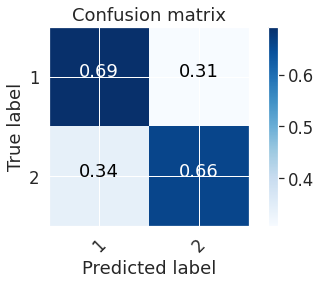

In [124]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


### Plotting Confusion Matrix
cm = confusion_matrix(Y_val, yhat)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=[1, 2],normalize=True, title='Confusion matrix')
print("------------------------------------------------------------")

### **ROC Curve Generation**

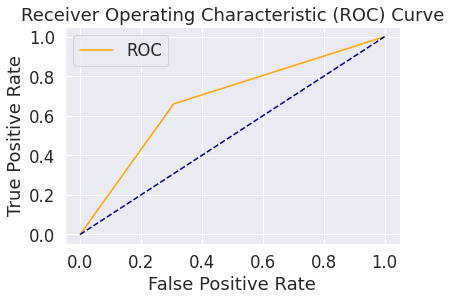

In [119]:
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(Y_val, yhat) 
print(fper, tper, thresholds)
plot_roc_curve(fper, tper)

In [123]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(Y_val, yhat))

0.6764745887754596
